# TP 6 -  Sampling random numbers


<h4 align="right"> Hicham Janati </h4>


In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

### 


# 1- pseudo-random generators

The generator RANDU is a linear pseudo-random generator defined by the sequence of division rests on all integers of a 32-bit system:
$$ x_{n+1} = (2^{16} + 3) x_n \text{ mod } [2^{31}] $$
so that the sequence $$u_{n} = \frac{x_n}{2^{31}}$$ follows a uniform distribution over [0, 1]. The purpose of this exercise is to show why RANDU is considered one of the worst pseudo-random generators of all time.

In [4]:
def randu(N, seed=1):
    """RANDU generator.
    N: int.
        number of samples.
    s: int.
        random seed.
    """
    X = []
    x = seed
    for i in range(N):
        a = (2 ** 16 + 3) * x
        x = a % (2 ** 31)
        X.append(x / 2 ** 31)
    X = np.array(X)
    return X

randu(10)

array([3.05189751e-05, 1.83109660e-04, 8.23987182e-04, 3.29593616e-03,
       1.23597323e-02, 4.44949684e-02, 1.55732220e-01, 5.33938602e-01,
       8.02041636e-01, 6.80239918e-03])

### Question 1.
Show that after $2^{31}$ iterations, each integer between 0 and $2^{31}-1$ has been returned once and only once. 

### Question 2.
Generate 10000 samples using RANDU and plot $u_{n+1}$ as a function of $u_{n}$ for all $u_{n} \in [0.5, 0.51]$. What do you observe ?

#### Question 3. 
Generate 10000 samples using RANDU and plot $u_{n+2}$ as a function of $u_{n}$ for all $u_{n+1} \in [0.5, 0.51]$. What do you observe ?

#### Question 2. 
 Visualize this phenomenon using a 3 dimensions plot

#### Question 4
An easy way to write an integer in base 2 is:

In [ ]:
x = 14
x_bin = int("{0:b}".format(x))
x_bin

Show that the last bits (the ones with low weight) of a RANDU sequence have a very small cycling period.

The pseudo-randomg generator used in Numpy (and most programming languages) is based on the Mersenne Twister algorithm which, loosely speaking is based on a buffer of size m i.e when given a seed $x_0$, the first generated output would be $x_{m+1}$. This makes it enjoy better statistical properties. 

# 2 - Sampling: inversing the CDF and rejection sampling
1. Assume we now have a (reliable) pseudo-random generator RAND of a uniform distribution in [0, 1]. How can we generate samples following a different distribution with known CDF F using uniform samples from RAND using the <a href=https://en.wikipedia.org/wiki/Inverse_transform_sampling> inversion theorem </a>?

We know that $F^{-1}(RAND) \backsim F$

2. Applying this strategy to the exponential distribution, implement a generator of samples following the exponential 
distribution of parameter $\alpha$. 
Compare the histogram of the samples you generate with the desired density.

In [59]:
alpha = 1
u= np.random.rand()

def CDF_exp_law(x):
    return 1-np.exp(-alpha*x)

def CDF_exp_law_inv(x):
    return -np.log(1-x)/alpha

def generate(F,N):
    X=[]
    for i in range(N):
        U = np.random.rand()
        x = CDF_exp_law_inv(U)
        X.append(x)
    return np.array(X)

generate(CDF_exp_law,10)

array([3.44875560e+00, 9.12272106e-01, 1.61480495e+00, 4.96681624e-01,
       1.46803910e+00, 2.58756289e-03, 2.67841197e+00, 1.53983409e+00,
       3.43159828e+00, 1.56671395e+00])

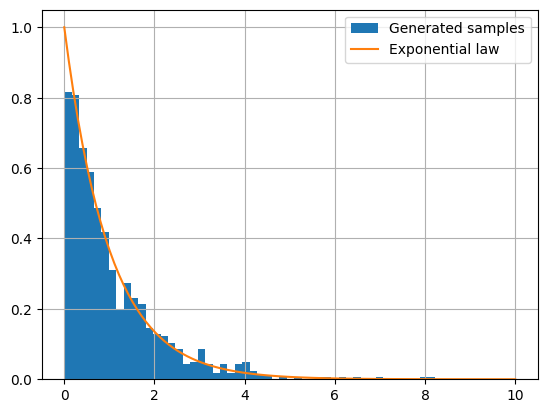

In [72]:
plt.hist(generate(CDF_exp_law,1000), bins=50, density=True, label='Generated samples')
plt.plot(np.linspace(0,10,100), alpha*np.exp(-alpha*np.linspace(0,10,100)), label='Exponential law')
plt.grid()
plt.legend()
plt.show()

3. Consider a random variable X following an exponential distribution with parameter $\alpha$. Determine the distribution of the integer part of X i.e the distribution of floor(X). Deduce a random generator for the geometric distribution.


 $$ X \backsim Exp(\alpha)$$
 $$\lfloor X \rfloor \backsim G(1-e^{-\alpha})

4. Apply this strategy to write a pseudo-random generator of samples following the Laplace distribution with density:
$$ p(x) = \frac{1}{2}\exp(-|x|)$$

$$ X \backsim Exp(1) \indep Y \backsim Exp(1)$$
$$ (X-Y) \backsim p(dx)



5. Assume we want to sample from a distribution with density f(x). The <a href=https://en.wikipedia.org/wiki/Rejection_sampling> rejection sampling</a> method generates samples so as "to fill the area" below the graph of the density function. To do so, one must have a method to sample from an area "surrounding" the density function graph and accept the sample if the point is below the graph, reject it otherwise.

Let f be the centered and normalized Gaussian density function. Find the smallest constant M such that $f(x) \leq Mp(x)$. Using $p(x)$ where $p$ is the Laplace distribution a surrogate function for the Gaussian density, write a generator of Gaussian samples based the accept-reject method.

$$ M = e^{\frac{1}{2}}\sqrt{\frac{1}{\pi}}

6. Can we do the opposite ? Generate Laplace samples using a Gaussian generator via accept-reject ?

## 3 - Sampling: Box-Muller algorithm

The Box-Muller algorithm has been designed to generate Gaussian samples efficiently. It bases on uniform random variables but instead of using the inverse CDF, it uses an alternative formulation.


Consider the following algorithm: 
1. Sample two random variables $U_1, U_2 \sim U[0, 1]$.
2. Define $X = \sqrt{-2\log(U_1)}\sin(2\pi U_2)$ and $Y = \sqrt{-2\log(U_1)}\cos(2\pi U_2)$.


##### Question 1.
By an appropriate change of variable, show that $X, Y$ are independent and follow $\mathcal{N}(0, 1)$.

##### Question 2
Draw Gaussian samples from the box-muller sampler and visualize its performance. Make sure your sampler is vectorized: generate n samples without any loops. You may consider using %timeit to evaluate the computational time needed by the algorithm and compare it with the algorithm of question 2.5.

###### Question 3.


An improved version of the Box-muller algorithm is given by:
1. Sample two random variables $U_1, U_2 \sim U[-1, 1]$ until $\|(U_1, U_2)\|^2 \leq 1$.
2. Define $X = U_1\sqrt{-2\log(S)/S}$ and $Y = U_2\sqrt{-2\log(S)/S}$ where $S = \|(U_1, U_2)\|^2.$

Compare both sampling methods. Why could the Box-muller be better a priori ?